# Q-learning on a discrete maze

This example demonstrates how to use the discrete Temporal Difference
Reinforcement Learning algorithms (SARSA, Q, Q(lambda)) in a classical
fully observable MDP maze task. The goal point is in the lower right corner.

In [1]:
# prepare plotting
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from matplotlib import animation, rc
from IPython.display import HTML
# rcParams['animation.writer'] = 'ffmpeg'

from pybrain.rl.environments.mazes import Maze, MDPMazeTask
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q, QLambda, SARSA #@UnusedImport
from pybrain.rl.explorers import BoltzmannExplorer #@UnusedImport
from pybrain.rl.experiments import Experiment
__author__ = 'Thomas Rueckstiess, ruecksti@in.tum.de, John Mark Agosta john-mark.agosta@microsoft.com'



The RL Q-learner consists of an agent that incorporates a learning algorithm and an environment with the maze to be solved. The experiment combines the agent and environment.

In [2]:


# create the maze with walls (0 - open square, 1 - blocked)
envmatrix = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [1, 0, 0, 1, 0, 0, 0, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 1, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1]])


env = Maze(envmatrix, (7, 7))

# create task
task = MDPMazeTask(env)

# create value table and initialize with ones
table = ActionValueTable(81, 4)
table.initialize(1.)

# create agent with controller and learner - use SARSA(), Q() or QLambda() here
learner = SARSA()

# standard exploration is e-greedy, but a different type can be chosen as well
# learner.explorer = BoltzmannExplorer()

# create agent
agent = LearningAgent(table, learner)

# create experiment
experiment = Experiment(task, agent)



In [3]:
def tb_mean(tbl):
    tb = tbl.params.reshape(81,4).max(1).reshape(9,9)
    return np.mean(tb.flatten())
tb_mean(table)

1.0

The grid shows a dark blue connected channel with a goal square in the lower right.

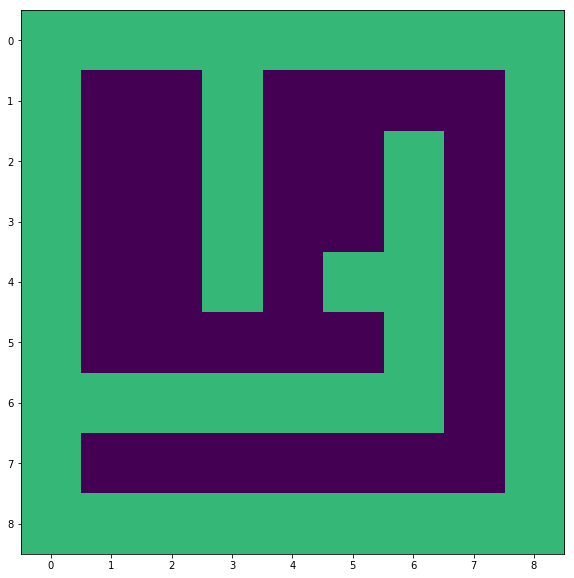

In [4]:
# Initialize the animation canvas
fig, ax = plt.subplots(figsize= (10,10))
im = plt.imshow(envmatrix, vmin=0, vmax=1.5, animated=True)

def im_init():
    table.initialize(1.0)
    im.set_data(table.params.reshape(81,4).max(1).reshape(9,9))
    return [im]

In [5]:
def im_animate(i):
    # interact with the environment (here in batch mode)
    experiment.doInteractions(100)
    agent.learn()
    agent.reset()

    y = table.params.reshape(81,4).max(1).reshape(9,9)
    # Highlight the goal.  
    y[7,7]  = max(y.flatten())
    # plot
    im.set_array(y)
    # Record how we are doing. 
    value_traj.append(tb_mean(table))
    return [im]

In [6]:
# call the animator. blit=True means only re-draw the parts that have changed.
# See http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
im_anim = animation.FuncAnimation(fig, im_animate, init_func=im_init,
                               frames=220, interval=60, blit=True)

We run the experiment, displaying an animated plot of the maze as the value improves. (This takes about 1 minute.)

In [7]:
value_traj = []
HTML(im_anim.to_html5_video())

In [8]:
# Save the video animation in mp4 format, playable by
# ffplay maze_200frame_1.mp4
#
im_anim.save("maze_200frame_1.mp4")

### Learned value function for the maze

The value function shows roughly increasing values shown by lighter shades, leading to the goal square.

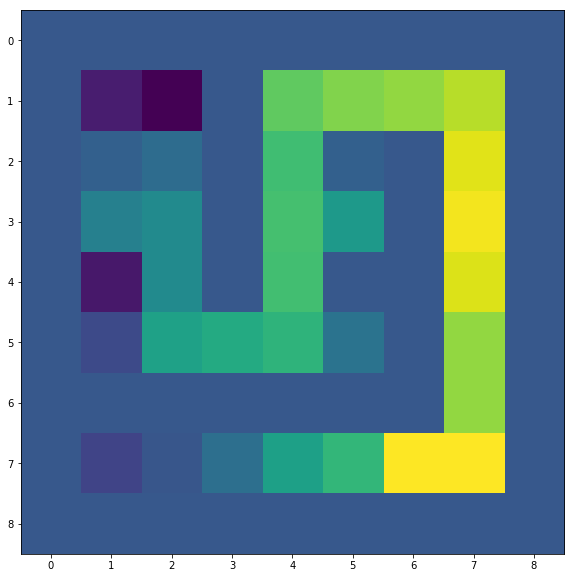

In [9]:
y = table.params.reshape(81,4).max(1).reshape(9,9)
y[7,7]  = max(y.flatten())
fig = plt.figure(figsize= (10,10)) 
plt.imshow(y)

Text(0, 0.5, 'Value')

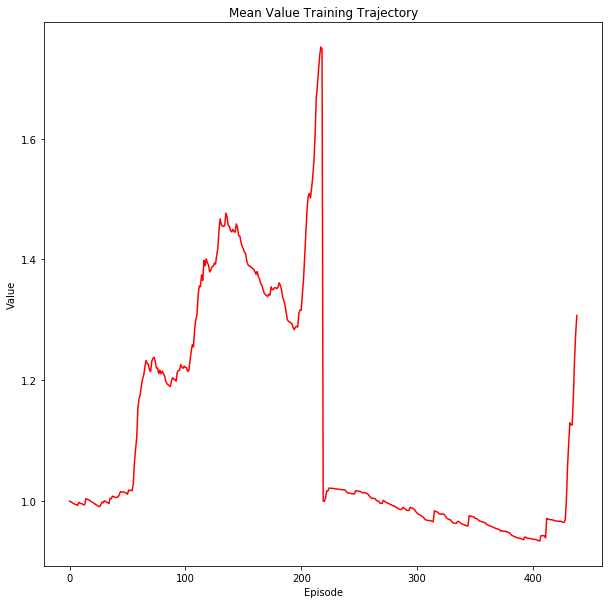

In [10]:
fig = plt.figure(figsize= (10,10)) 
plt.plot(value_traj[1:], 'r')
plt.axis('tight')
plt.title("Mean Value Training Trajectory")
plt.xlabel("Episode")
plt.ylabel("Value")